In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_excel('Book1.xlsx')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

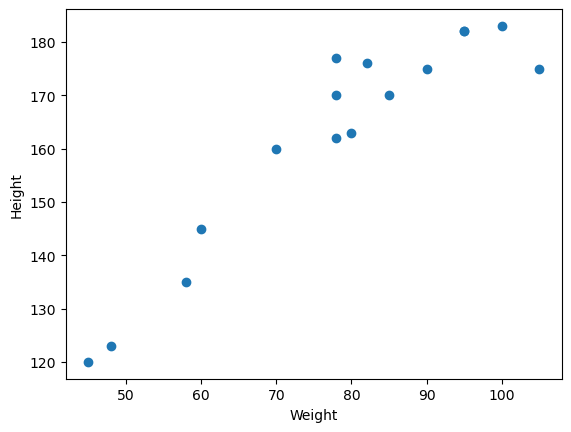

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')


In [6]:
x=df[['Weight']]
y=df[['Height']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
x.shape

(16, 1)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12, 1), (4, 1), (12, 1), (4, 1))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [58]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

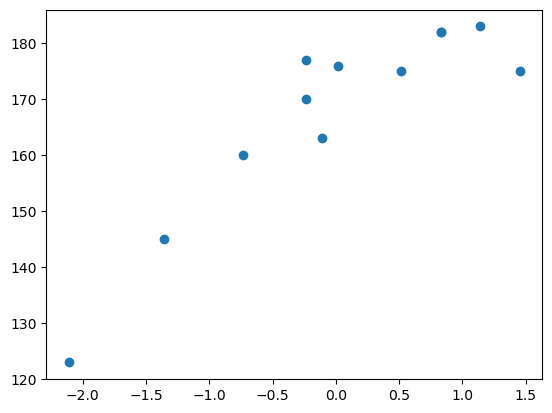

In [59]:
plt.scatter(x_train_scaled,y_train)

In [37]:
from sklearn.linear_model import LinearRegression

In [60]:
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)

LinearRegression()

In [62]:
print("The slope of weight is",linreg.coef_)
print("The intercept of weight is",linreg.intercept_)

The slope of weight is [[15.34724528]]
The intercept of weight is [167.58333333]


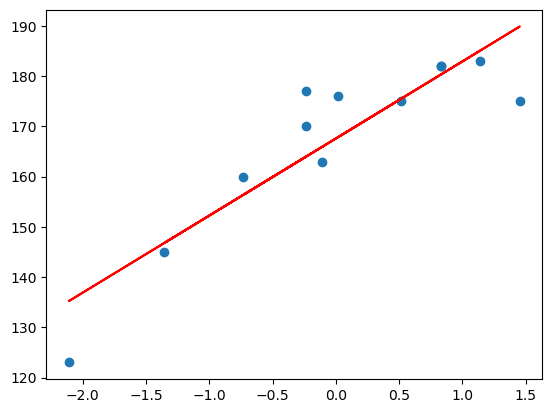

In [65]:
plt.scatter(x_train_scaled,y_train)
y_pred_train=linreg.predict(x_train_scaled)
plt.plot(x_train_scaled,y_pred_train,color='r')

In [66]:
y_pred_test=linreg.predict(x_test_scaled)

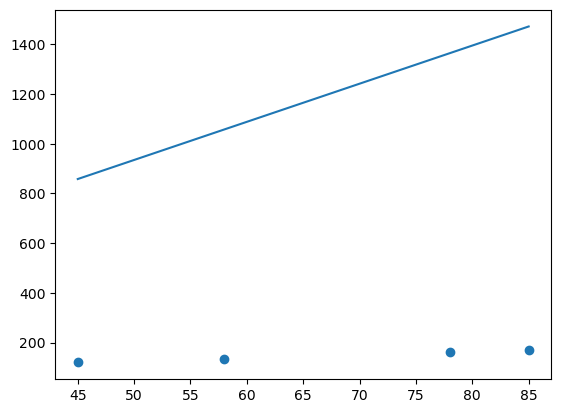

In [67]:
plt.scatter(x_test_scaled,y_test)
plt.plot(x_test_scaled,y_pred_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,adjusted_rand_score

In [46]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=root_mean_squared_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print(mse,mae,rmse,score)

1134561.3904249072 1041.4251446519356 1065.157918068916 -2788.7621402794707


In [47]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-4183.643210419206

In [48]:
scaled_wt=scaler.transform([[80]])
scaled_wt

array([[80.]])

In [50]:
linreg.predict([scaled_wt[0]])

array([[1395.36295597]])

In [51]:
import seaborn as sns

In [55]:
residuals=y_test-y_pred_test
residuals

,Height
0,-738.209371
1,-922.723560
5,-1202.668465
14,-1302.099182


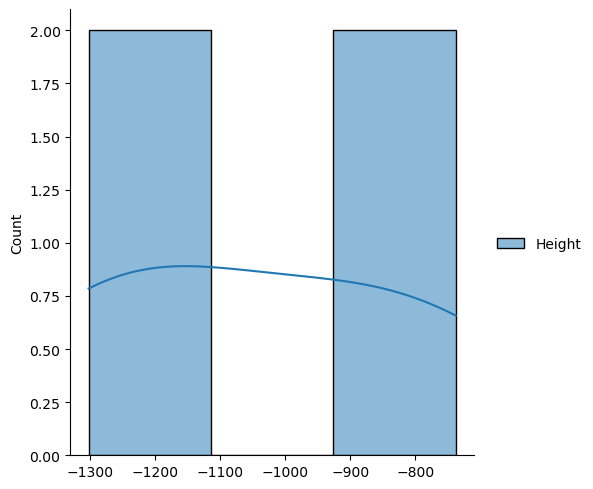

In [57]:
sns.displot(residuals,kde=True)

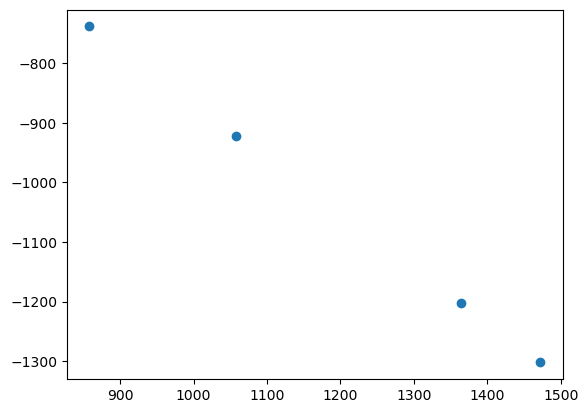

In [68]:
plt.scatter(y_pred_test,residuals)